In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [18]:
df_hosp = pd.read_excel('HospitalDatabase.xlsx',sheet_name = None)
pats=df_hosp['Patients']
ed_visits=df_hosp['EDVisits']
amb_visits=df_hosp['AmbulatoryVisits']
re_adm=df_hosp['ReAdmissionRegistry']
discharges=df_hosp['Discharges']
providers=df_hosp['Providers']
ed_unique=df_hosp['EDUnique']

# 61:Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

In [9]:
hypertension_count = amb_visits.loc[(amb_visits['BloodPressureSystolic'] > 180) & (amb_visits['BloodPressureDiastolic'] > 120), 'PatientMRN'].nunique()

print("Count of patients prone to hypertension crisis:", hypertension_count)

Count of patients prone to hypertension crisis: 87


# 62:Which patient id has most entries in readmission registry.

In [10]:
most_common_patient_id = re_adm['PatientID'].value_counts().idxmax()
most_common_patient_entries = re_adm['PatientID'].value_counts().max()

print(f"Patient ID: {most_common_patient_id} has the most entries in the readmission registry with {most_common_patient_entries} entries")

Patient ID: 23 has the most entries in the readmission registry with 3 entries


# 63:If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

In [11]:
def add_title(first_name, last_name, gender):
    full_name = f"{first_name} {last_name}"
    if gender == 'Female':
        return 'Ms. ' + full_name
    elif gender == 'Male':
        return 'Mr. ' + full_name
    else:
        return full_name

# Apply the function to create the ModifiedName column
pats['ModifiedName'] = pats.apply(lambda row: add_title(row['FirstName'], row['LastName'], row['Gender']), axis=1)

pats['ModifiedName']

0             Mr. Lanni Sue
1             Mr. Far Myers
2       Mr. Devlin  Michael
3         Mr. Carmine Texas
4            Mr. Tann  Bama
               ...         
940         Mr. Wat Fideler
941     Mr. Wandie Baythrop
942     Mr. Diahann Smeeton
943    Mr. Panchito Sharple
944        Mr. Walsh Calvie
Name: ModifiedName, Length: 945, dtype: object

# 64:Plot a graph by counting the no. of patients in each department.

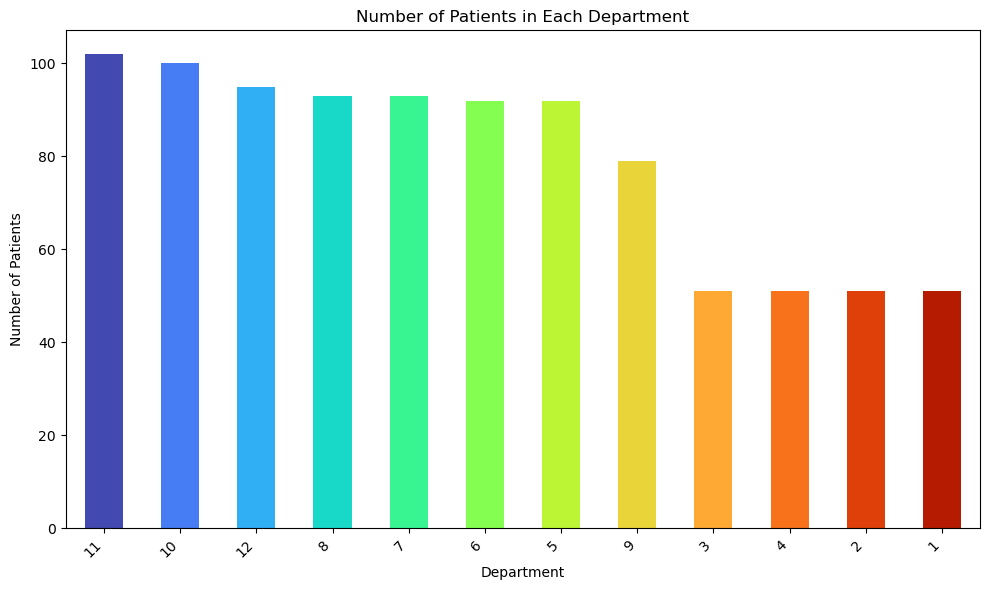

In [15]:
department_counts = amb_visits['VisitDepartmentID'].value_counts()

sequential_palette = sns.color_palette("turbo", n_colors=len(department_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar', color=sequential_palette)
plt.title('Number of Patients in Each Department')
plt.xlabel('Department')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# 65:Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'. Create a new column to show your analysis.  

In [16]:
# Create bins and labels for different levels of hypertension
bins = [0, 120, 129, 139, 180]
labels= ['Mild Hypertension', 'Moderate', 'High Hypertension', 'Severe Hypertension']
# Create a new column 'HypertensionLevel' based on readings
amb_visits['HypertensionLevel'] = pd.cut(amb_visits['BloodPressureSystolic'], bins=bins, labels=labels, right=False)

print(amb_visits[['PatientMRN', 'HypertensionLevel']])

     PatientMRN    HypertensionLevel
0           840                  NaN
1           820  Severe Hypertension
2           879    High Hypertension
3           884    High Hypertension
4            32    High Hypertension
..          ...                  ...
945         873                  NaN
946         855                  NaN
947         865  Severe Hypertension
948         635  Severe Hypertension
949         847  Severe Hypertension

[950 rows x 2 columns]


# 66:Plot a graph showing the count of patients for the reason visited the hospital.

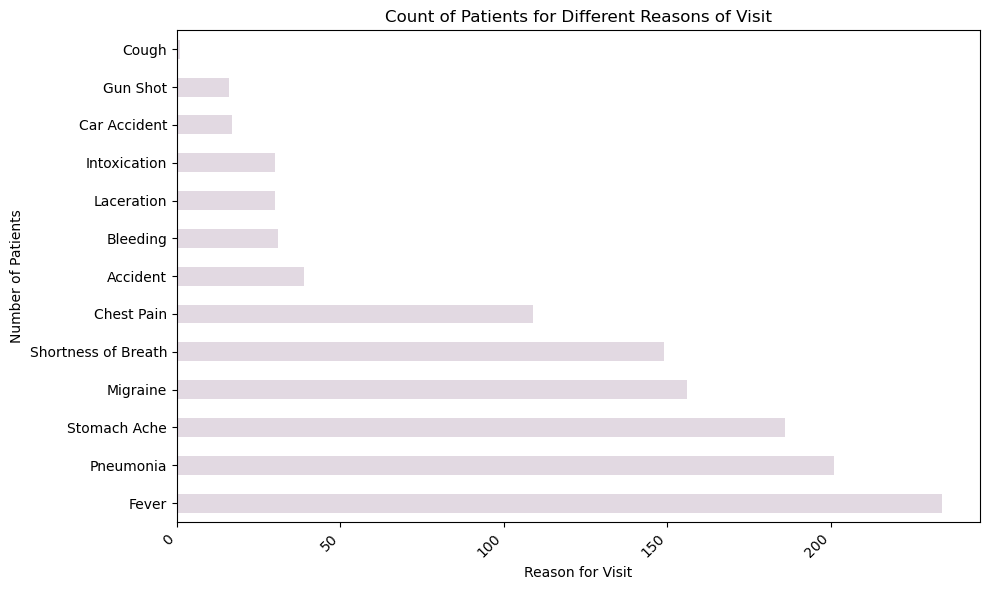

In [29]:
#  Count the number of patients by reason for visit
reason_counts = ed_visits['ReasonForVisit'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
reason_counts.plot(kind='barh', colormap='twilight_r')
plt.title('Count of Patients for Different Reasons of Visit')
plt.xlabel('Reason for Visit')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


67:Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

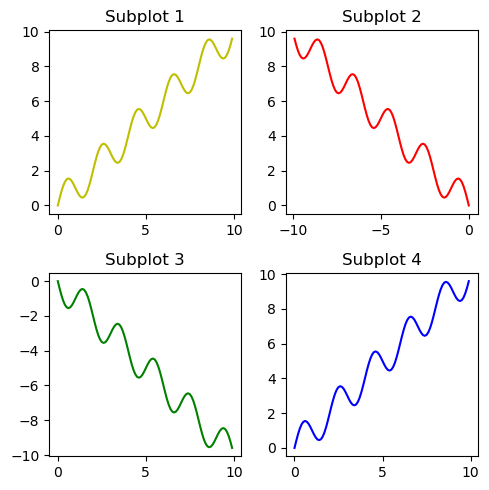

In [31]:
# Create x,y
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2,figsize=(5, 5))

# First subplot
axs[0, 0].plot(x, y,'y')
axs[0, 0].set_title('Subplot 1')

# Second subplot
axs[0, 1].plot(-x, y, 'r')
axs[0, 1].set_title('Subplot 2')

# Third subplot
axs[1, 0].plot(x, -y, 'g')
axs[1, 0].set_title('Subplot 3')

# Fourth subplot
axs[1, 1].plot(x, y, 'b')
axs[1, 1].set_title('Subplot 4')

# Adjust layout
plt.tight_layout()

plt.show()


# 68:Make a pivot table by the no. of patients from the admission date till discharge date.

# 69:Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [40]:
# Convert date columns to datetime
discharges['AdmissionDate'] = pd.to_datetime(discharges['AdmissionDate'])
discharges['DischargeDate'] = pd.to_datetime(discharges['DischargeDate'])

# Calculate Length of Stay (LOS) in days
discharges['LOS'] = (discharges['DischargeDate'] - discharges['AdmissionDate']).dt.days

# Create a pivot table for average LOS based on Service and Primary Diagnosis
pivot_table = discharges.pivot_table(index=['Service', 'PrimaryDiagnosis'], values='LOS', aggfunc='mean')

# Print the pivot table
print(pivot_table)


                                           LOS
Service          PrimaryDiagnosis             
Cardiology       AMI                 10.250000
                 Afib                11.200000
                 Broken Leg          10.666667
                 Flu                 12.000000
                 Heart Failure        9.512821
                 Kidney Failure       4.000000
General Medicine Broken Leg          13.000000
                 Diabetes            10.289474
                 Fever                8.000000
                 Flu                  9.888889
                 Hypertension         8.914286
                 Kidney Failure      10.666667
                 Laceration           9.428571
                 Pneumonia            9.417910
                 Stroke              11.250000
Hospitalist      AMI                 10.000000
                 Broken Leg           7.666667
                 Diabetes             8.846154
                 Fever               10.666667
             

# 70:Create a visualization on the count of patients based on primary diagnosis.

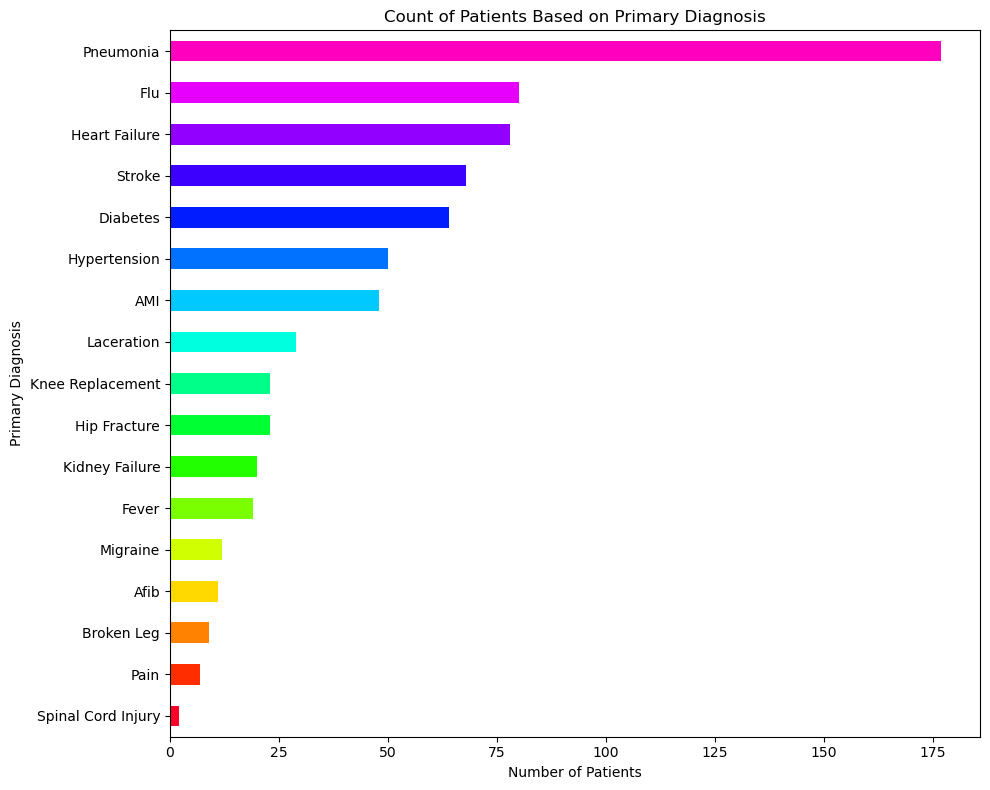

In [48]:
# Count of patients based on Primary Diagnosis
diagnosis_counts = discharges['PrimaryDiagnosis'].value_counts()

# Sort the diagnosis_counts in descending order
diagnosis_counts = diagnosis_counts.sort_values(ascending=True)

# Create a colormap
cmap = cm.get_cmap('gist_rainbow', len(diagnosis_counts))

# Create a horizontal bar plot with cubehelix colormap
plt.figure(figsize=(10, 8))
diagnosis_counts.plot(kind='barh', color=[cmap(i) for i in range(len(diagnosis_counts))])
plt.title('Count of Patients Based on Primary Diagnosis')
plt.xlabel('Number of Patients')
plt.ylabel('Primary Diagnosis')
plt.tight_layout()

# Show the plot
plt.show()


71:Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [59]:
# Split the "ProviderName" column into "FirstName" and "LastName"
providers[['FirstName', 'LastName']] =providers['ProviderName'].str.split(' ',expand=True)

print(providers[['ProviderName', 'FirstName', 'LastName']])

       ProviderName  FirstName  LastName
0         Sally Sue      Sally       Sue
1        Mike Myers       Mike     Myers
2    Jordan Michael     Jordan   Michael
3         Ted Texas        Ted     Texas
4          Ala Bama        Ala      Bama
5        Harry Kane      Harry      Kane
6         Barry Bar      Barry       Bar
7         Ted Green        Ted     Green
8         Ted Black        Ted     Black
9          Fred Man       Fred       Man
10     Kim Kimberly        Kim  Kimberly
11         Sarah Ab      Sarah        Ab
12  Abigail Marriot    Abigail   Marriot
13          Dave Yu       Dave        Yu
14  Christian Saint  Christian     Saint
15     Perry Pardon      Perry    Pardon
16     Kent Kendall       Kent   Kendall
17       Ryan Kevin       Ryan     Kevin
18     Tyler Conner      Tyler    Conner
19    Bailey Barret     Bailey    Barret
20      Megan Bonco      Megan     Bonco
21    Joesph Walter     Joesph    Walter
22      Walter King     Walter      King
23        Luke L

72:Create a boxplot on ExpectedLOS by taking service into account.

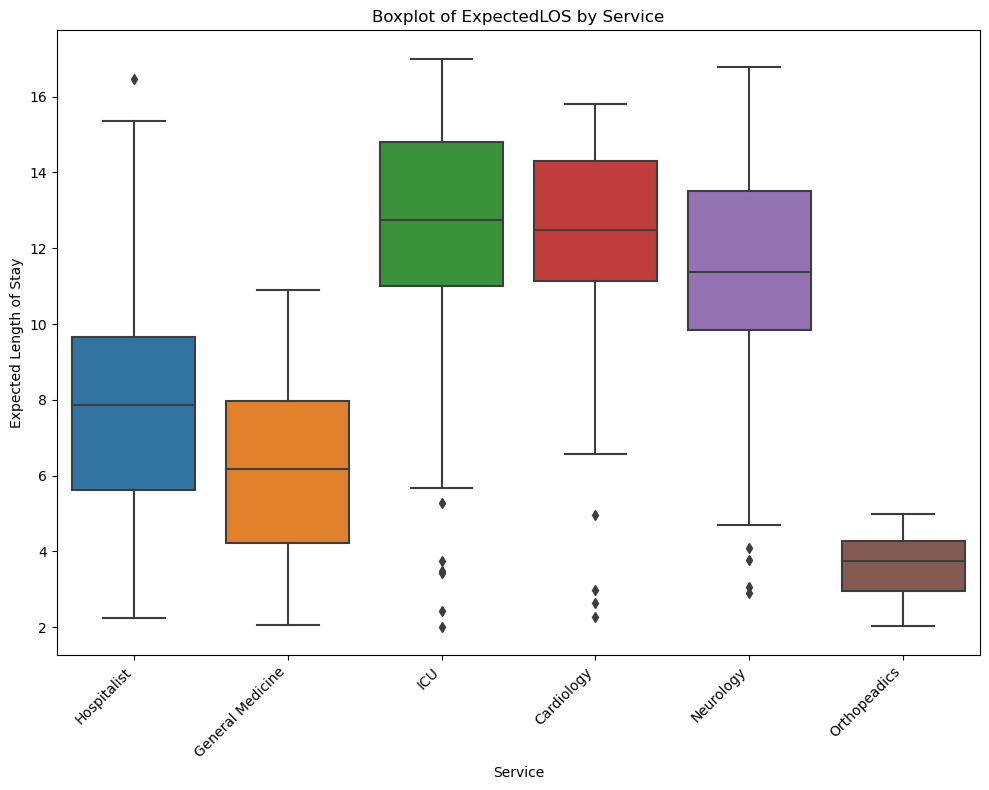

In [75]:
# Create a boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Service', y='ExpectedLOS', data=re_adm)
plt.title('Boxplot of ExpectedLOS by Service')
plt.xlabel('Service')
plt.ylabel('Expected Length of Stay')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


73:Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).

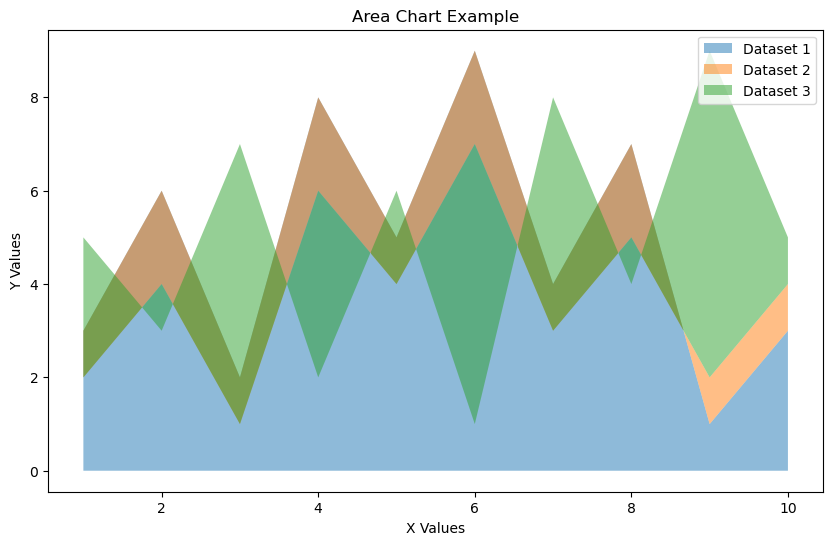

In [81]:
# Sample x values
x_values = np.arange(1, 11)

# Sample y values for multiple datasets
y1_values = np.array([3, 6, 2, 8, 5, 9, 4, 7, 1, 3])
y2_values = np.array([2, 4, 1, 6, 4, 7, 3, 5, 2, 4])
y3_values = np.array([5, 3, 7, 2, 6, 1, 8, 4, 9, 5])

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)

# Plot area charts for multiple datasets
ax.fill_between(x_values, y1_values, label='Info 1', alpha=0.5)
ax.fill_between(x_values, y2_values, y1_values, label='Info 2', alpha=0.5)
ax.fill_between(x_values, y3_values, y2_values, label='Info 3', alpha=0.5)

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Area Chart Example')

plt.legend()

plt.show()


74: Number of patients on 'Transfer' based on primary diagnosis.

In [83]:
# Filter only "transfer"
transfer_cases = re_adm[re_adm['DischargeDisposition'] == 'Transfer']

# Count the patients based on primary diagnosis
diagnosis_counts = transfer_cases['PrimaryDiagnosis'].value_counts()

print(diagnosis_counts)

Stroke              9
Heart Failure       9
Pneumonia           8
Diabetes            7
Flu                 2
Afib                1
Knee Replacement    1
Laceration          1
Pain                1
Name: PrimaryDiagnosis, dtype: int64


75: Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

In [85]:
# Find the index of the row with maximum BloodPressureSystolic
max_systolic_index = amb_visits['BloodPressureSystolic'].idxmax()

# Retrieve row using the Index
row_with_max_systolic = amb_visits.loc[max_systolic_index]

print("Row with Maximum BloodPressureSystolic:")
print(row_with_max_systolic)

Row with Maximum BloodPressureSystolic:
VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object


76: Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

77: Calculate mortality by diagnosis.

78: Calculate the time spent in ED Department for each visit.

In [87]:
# Convert VisitDate and EDDischargeTime to datetime objects
ed_unique['VisitDate'] = pd.to_datetime(ed_unique['VisitDate'])
ed_unique['EDDischargeTime'] = pd.to_datetime(ed_unique['EDDischargeTime'])

# Calculate time spent in ED for each visit
ed_unique['TimeSpentInED'] = ed_unique['EDDischargeTime'] - ed_unique['VisitDate']

# Print the resulting DataFrame
print(ed_unique[['PatientID', 'TimeSpentInED']])

     PatientID          TimeSpentInED
0            1 0 days 11:20:22.924000
1           12 0 days 23:14:20.215000
2           13 0 days 01:50:56.151000
3           14 0 days 01:20:09.793000
4           15 0 days 02:38:20.043000
..         ...                    ...
940        929 0 days 15:53:09.453000
941        932 0 days 22:27:04.030000
942        933 0 days 04:30:03.545000
943        934 0 days 06:10:35.054000
944        935 0 days 10:49:26.581000

[945 rows x 2 columns]


79: Which departmentID has maximum number of visits scheduled.

80. Plot a graph to show the distribution of expected mortality.

In [90]:
pats.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
